In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [3]:
loans_df=pd.read_csv("loans.csv")

In [4]:
loans_df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0


In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_WID       500000 non-null  int64  
 1   DisbursementDate   500000 non-null  object 
 2   Age                499989 non-null  float64
 3   CustomerType       499989 non-null  float64
 4   SOR                499989 non-null  float64
 5   MonthsSinceOpen    499989 non-null  float64
 6   MonthsSinceActive  499989 non-null  float64
 7   FinancialMeasure1  499989 non-null  float64
 8   FinancialMeasure2  499989 non-null  float64
 9   FinancialMeasure3  499989 non-null  float64
 10  FinancialMeasure4  499989 non-null  float64
 11  CRBScore           499989 non-null  float64
 12  Amount             500000 non-null  float64
 13  Default            500000 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 53.4+ MB


In [6]:
loans_df.describe()

,Customer_WID,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
count,500000.000000,499989.000000,499989.000000,499989.000000,499989.000000,499989.000000,4.999890e+05,4.999890e+05,4.999890e+05,4.999890e+05,499989.000000,500000.000000,500000.000000
mean,208928.520236,37.999568,1.279290,4.781061,89.711334,0.000004,1.535980e+04,1.190511e+04,1.009236e+05,1.018893e+05,586.127537,9155.098668,0.023830
std,120648.505833,10.986557,0.448664,0.910897,33.675991,0.002828,3.584068e+04,5.380335e+04,7.665491e+05,7.765588e+05,109.543161,16812.813799,0.152519
min,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,-4.523452e+06,0.000000e+00,0.000000e+00,0.000000,100.000000,0.000000
25%,104443.750000,30.000000,1.000000,4.000000,65.000000,0.000000,0.000000e+00,7.661200e+02,1.186523e+04,1.109770e+04,547.000000,2000.000000,0.000000
50%,209088.500000,36.000000,1.000000,5.000000,96.000000,0.000000,0.000000e+00,2.819820e+03,1.939200e+04,1.861900e+04,603.000000,4900.000000,0.000000
75%,313030.250000,44.000000,2.000000,5.000000,116.000000,0.000000,2.076600e+04,7.417820e+03,3.872886e+04,3.740300e+04,653.000000,9900.000000,0.000000
max,418241.000000,118.000000,3.000000,8.000000,144.000000,2.000000,2.186055e+06,5.705195e+06,9.747924e+07,9.467495e+07,747.000000,200000.000000,1.000000


In [7]:
#null values in the dataset
loans_df.isnull().sum()

Customer_WID          0
DisbursementDate      0
Age                  11
CustomerType         11
SOR                  11
MonthsSinceOpen      11
MonthsSinceActive    11
FinancialMeasure1    11
FinancialMeasure2    11
FinancialMeasure3    11
FinancialMeasure4    11
CRBScore             11
Amount                0
Default               0
dtype: int64

In [8]:
#drop the null values
loans_df=loans_df.dropna()

In [9]:
#null values dropped
loans_df.isnull().sum()

Customer_WID         0
DisbursementDate     0
Age                  0
CustomerType         0
SOR                  0
MonthsSinceOpen      0
MonthsSinceActive    0
FinancialMeasure1    0
FinancialMeasure2    0
FinancialMeasure3    0
FinancialMeasure4    0
CRBScore             0
Amount               0
Default              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

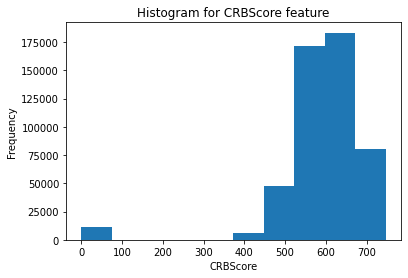

In [10]:
plt.hist(loans_df['CRBScore'])
plt.title("Histogram for CRBScore feature")
plt.xlabel("CRBScore")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

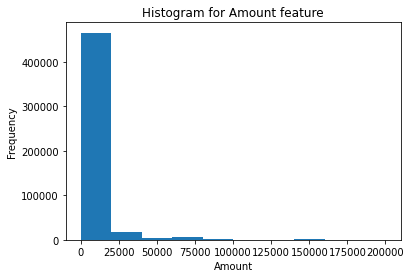

In [11]:
plt.hist(loans_df['Amount'])
plt.title("Histogram for Amount feature")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show

<AxesSubplot:xlabel='Age'>

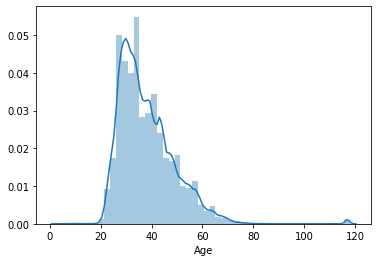

In [12]:
#Distribution of the age feature
sns.distplot(loans_df["Age"])

<AxesSubplot:xlabel='CRBScore'>

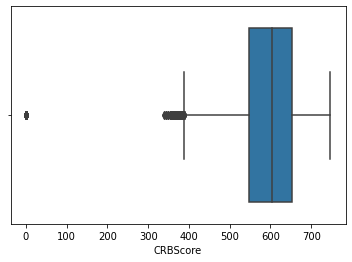

In [68]:
sns.boxplot(loans_df["CRBScore"])

In [80]:
loans_df["CRBScore"]

<AxesSubplot:xlabel='SOR', ylabel='CRBScore'>

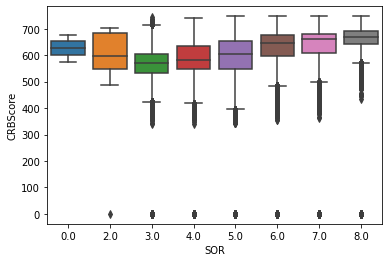

In [13]:
sns.boxplot(x="SOR",y="CRBScore",data=loans_df)

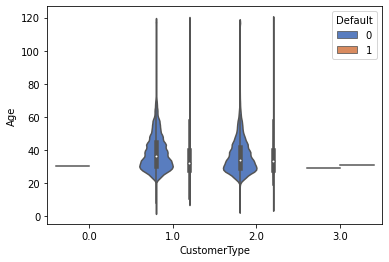

In [14]:
#violin plot showing Default distribution along age and customertype
ax = sns.violinplot(x="CustomerType", y="Age", hue="Default",data=loans_df, palette="muted",scale="count")

In [15]:
loans_df['SOR'].value_counts()

5.0    311027
4.0     86345
3.0     51469
6.0     26789
7.0     19890
8.0      4443
2.0        24
0.0         2
Name: SOR, dtype: int64

<AxesSubplot:xlabel='CRBScore', ylabel='Amount'>

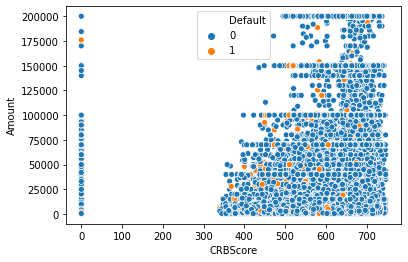

In [16]:
sns.scatterplot(x="CRBScore",y="Amount",hue="Default",data=loans_df)

<AxesSubplot:xlabel='MonthsSinceOpen'>

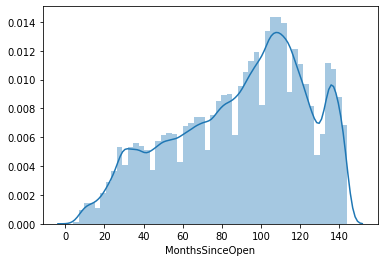

In [17]:
sns.distplot(loans_df["MonthsSinceOpen"])

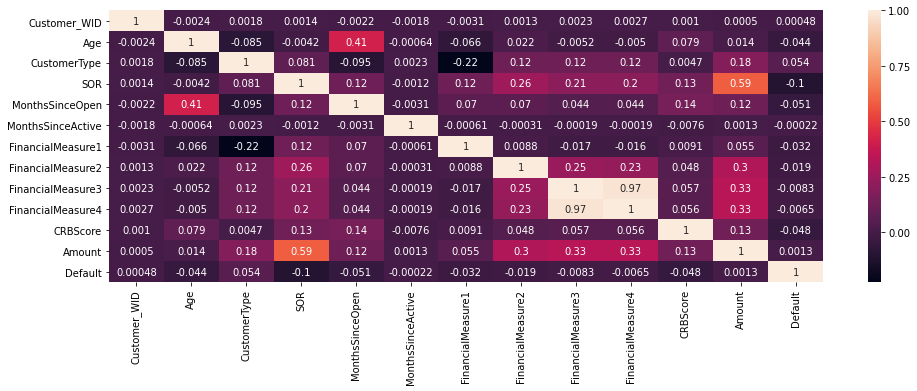

In [18]:
# correlation heatmap
correlation=loans_df.corr(method='pearson')
plt.figure(figsize=(16,5))
# plot correlation matrix
ax = sns.heatmap(correlation, annot=True)

# Feature selection

MothsSinceActive and Customer_WID  are very uncorrelated to Default as illustrated by the heatmap.Their correlation with default lies in the ten of thousandths.So these fields shall be dropped.Financial measure 3 and financial measure 4 are highly correlated so one of the two features needs to be dropped in training the model.Disbursementdate will also be dropped as it adds little value to training of the model.

In [19]:
modified_loans_df=loans_df.drop(["Customer_WID","MonthsSinceActive","DisbursementDate","FinancialMeasure3"],axis=1)

In [20]:
modified_loans_df.head()

,Age,CustomerType,SOR,MonthsSinceOpen,FinancialMeasure1,FinancialMeasure2,FinancialMeasure4,CRBScore,Amount,Default
0,27.0,1.0,3.0,53.0,0.0,25.85,8885.0,547.0,1000.0,0
1,54.0,1.0,3.0,142.0,0.0,12.05,3807.0,506.0,2050.0,0
2,44.0,2.0,5.0,70.0,0.0,369.04,13883.0,554.0,500.0,0
3,30.0,1.0,5.0,93.0,0.0,403.01,13481.0,569.0,200.0,0
4,36.0,1.0,5.0,116.0,39678.0,2143.38,19227.4,633.0,7000.0,0


In [21]:
#initializing x and y variables
x=modified_loans_df.drop(["Default","FinancialMeasure2"],axis=1)

In [22]:
x.head()

,Age,CustomerType,SOR,MonthsSinceOpen,FinancialMeasure1,FinancialMeasure4,CRBScore,Amount
0,27.0,1.0,3.0,53.0,0.0,8885.0,547.0,1000.0
1,54.0,1.0,3.0,142.0,0.0,3807.0,506.0,2050.0
2,44.0,2.0,5.0,70.0,0.0,13883.0,554.0,500.0
3,30.0,1.0,5.0,93.0,0.0,13481.0,569.0,200.0
4,36.0,1.0,5.0,116.0,39678.0,19227.4,633.0,7000.0


In [23]:
(x<0).any().any()

False

In [24]:
y=modified_loans_df["Default"]

In [25]:
(y<0).any()

False

In [26]:
best_features=SelectKBest(score_func=chi2,k="all")
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
featureScores=pd.concat([df_scores,df_columns],axis=1)
featureScores.columns=['Specs','Scores']
featureScores.sort_values(ascending="false",by="Scores")

,Specs,Scores
0,3.142468e+03,Age
7,2.484145e+04,Amount
6,2.322474e+04,CRBScore
1,2.261166e+02,CustomerType
4,4.328420e+07,FinancialMeasure1
5,1.235236e+08,FinancialMeasure4
3,1.631542e+04,MonthsSinceOpen
2,9.539334e+02,SOR


In [27]:
#training and testing  data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [28]:
# concatenate training data back together
X=pd.concat([X_train,y_train],axis=1)

In [29]:
#seperate minority and majority classes
non_default=X[X.Default==0]
default=X[X.Default==1]

In [30]:
#upsample minority
default_upsampled=resample(default,replace=True, # sample with replacement
                          n_samples=len(non_default), # match number in majority class
                          random_state=27) # reproducible results

In [31]:
# combine majority and upsampled minority
upsampled = pd.concat([non_default, default_upsampled])


In [32]:
upsampled.Default.value_counts()

0    390456
1    390456
Name: Default, dtype: int64

In [33]:
len(X_train)

399991

In [34]:
len(X_test)

99998

In [35]:
y_train=upsampled.Default
X_train=upsampled.drop('Default',axis=1)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [38]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [39]:
upsampled_pred=upsampled.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,upsampled_pred)

array([[70530, 27088],
       [  781,  1599]], dtype=int64)

In [41]:
accuracy_score(y_test,upsampled_pred)

0.7213044260885217

In [42]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()

In [44]:
rf.fit(X_train,y_train)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred_rf=rf.predict(X_test)

In [46]:
confusion_matrix(y_pred_rf,y_test)

array([[97425,  2306],
       [  193,    74]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred_rf)

0.9750095001900038

In [48]:
#Decision tree classifier
DecisionTreeModel=DecisionTreeClassifier()
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
DecisionTree_ypred=DecisionTreeModel.predict(X_test)

In [50]:
confusion_matrix(DecisionTree_ypred,y_test)

array([[95580,  2180],
       [ 2038,   200]], dtype=int64)

In [51]:
accuracy_score(DecisionTree_ypred,y_test)

0.9578191563831276

In [52]:
#xgboost classifier
xgb_model=XGBClassifier()

In [53]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
xgb_pred=xgb_model.predict(X_test)

In [55]:
confusion_matrix(xgb_pred,y_test)

array([[74088,   713],
       [23530,  1667]], dtype=int64)

In [56]:
accuracy_score(xgb_pred,y_test)

0.757565151303026

In [57]:
pickle.dump(rf, open('RandomForest_model.pkl','wb'))

In [62]:
model = pickle.load(open('RandomForest_model.pkl','rb'))
print(model.predict([[1.8,54,356,38,89,39,8,43]]))

[0]


In [63]:
pickle.dump(DecisionTreeModel, open('DecisionTree_model.pkl','wb'))

In [65]:
model = pickle.load(open('DecisionTree_model.pkl','rb'))
print(model.predict([[1.8,54,356,38,89,38,39,839]]))

[0]


In [66]:
pickle.dump(xgb_model, open('xgb_model.pkl','wb'))

In [67]:
model = pickle.load(open('xgb_model.pkl','rb'))
print(model.predict([[1.8,54,356,38,89,38,39,839]]))

[0]
